# بررسی رابطه قد و وزن با رتبه و جوایز دریافتی

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

home_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/home_team_parquet"):
    single_stats = pd.read_parquet("raw/home_team_parquet/" + file)
    home_team_dataframe = pd.concat([home_team_dataframe, single_stats], axis= 'rows', ignore_index=True)

away_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/away_team_parquet"):
    single_stats = pd.read_parquet("raw/away_team_parquet/" + file)
    away_team_dataframe = pd.concat([away_team_dataframe, single_stats], axis= 'rows', ignore_index=True)

In [2]:


# مرحله 1: حذف مقادیر None یا NaN از ستون‌های 'current_rank' و 'total_prize'
cleaned_df = home_team_dataframe.dropna(subset=['current_rank', 'total_prize'])

# مرحله 2: جایگزینی مقادیر None یا NaN در ستون‌های 'height' و 'weight' با میانگین آن‌ها
cleaned_df['height'].fillna(cleaned_df['height'].mean(), inplace=True)
cleaned_df['weight'].fillna(cleaned_df['weight'].mean(), inplace=True)

# مرحله 3: محاسبه همبستگی بین ویژگی‌های فیزیکی (قد و وزن) با رتبه و جوایز مالی
correlation_height_rank = cleaned_df['height'].corr(cleaned_df['current_rank'])
correlation_weight_rank = cleaned_df['weight'].corr(cleaned_df['current_rank'])
correlation_height_prize = cleaned_df['height'].corr(cleaned_df['total_prize'])
correlation_weight_prize = cleaned_df['weight'].corr(cleaned_df['total_prize'])

# نمایش نتایج همبستگی
print(f"Correlation between height and current rank: {correlation_height_rank}")
print(f"Correlation between weight and current rank: {correlation_weight_rank}")
print(f"Correlation between height and total prize: {correlation_height_prize}")
print(f"Correlation between weight and total prize: {correlation_weight_prize}")


Correlation between height and current rank: -0.03685621312168889
Correlation between weight and current rank: 0.04954933134272733
Correlation between height and total prize: 0.05452925142350774
Correlation between weight and total prize: -0.020434181680023346


C:\Users\Battousai\AppData\Local\Temp\ipykernel_15288\1228173986.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['height'].fillna(cleaned_df['height'].mean(), inplace=True)
C:\Users\Battousai\AppData\Local\Temp\ipykernel_15288\1228173986.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['weight'].fillna(cleaned_df['weight'].mean(), inplace=True)


### تحلیل ضرایب همبستگی بین قد، وزن و موفقیت بازیکنان:

با توجه به نتایج همبستگی که ارائه دادید، ضرایب همبستگی به شرح زیر هستند:

1. **همبستگی بین قد و رتبه (Current Rank)**:  
   - ضریب همبستگی: **-0.0368**
   - این مقدار نشان می‌دهد که رابطه بسیار ضعیفی و منفی بین قد و رتبه بازیکنان وجود دارد. یعنی با افزایش قد، رتبه بازیکنان به طور بسیار جزئی بهبود پیدا می‌کند، اما این رابطه به هیچ وجه معنادار نیست.

2. **همبستگی بین وزن و رتبه (Current Rank)**:  
   - ضریب همبستگی: **0.0495**
   - رابطه بسیار ضعیفی و مثبت بین وزن بازیکنان و رتبه آنها مشاهده می‌شود. یعنی افزایش وزن با رتبه کمی بالاتر همراه است، اما همانند قد، این رابطه هم بسیار ضعیف و غیرمعنادار است.

3. **همبستگی بین قد و مجموع جوایز (Total Prize)**:  
   - ضریب همبستگی: **0.0545**
   - رابطه‌ای مثبت و بسیار ضعیف بین قد و مجموع جوایز بازیکنان وجود دارد. به این معنا که بازیکنانی که قد بلندتری دارند، کمی بیشتر جایزه کسب می‌کنند، اما این رابطه نیز به اندازه کافی معنادار نیست.

4. **همبستگی بین وزن و مجموع جوایز (Total Prize)**:  
   - ضریب همبستگی: **-0.0204**
   - رابطه‌ای منفی و بسیار ضعیف بین وزن و مجموع جوایز بازیکنان وجود دارد. این مقدار به ما می‌گوید که بازیکنانی که وزن بیشتری دارند، به طور جزئی جوایز کمتری دریافت کرده‌اند، اما این رابطه هم معنادار نیست.

### نتیجه‌گیری کلی:
همه ضرایب همبستگی نزدیک به صفر هستند که نشان‌دهنده این است که **ارتباط معناداری بین ویژگی‌های فیزیکی (قد و وزن) و موفقیت بازیکنان (رتبه و مجموع جوایز)** در داده‌های موجود وجود ندارد. این امر ممکن است نشان دهد که عوامل دیگری مانند مهارت‌های فنی، استراتژی بازی، یا تجربه بازیکنان تأثیر بیشتری در موفقیت آن‌ها دارند.

### توصیه:
برای تحلیل بهتر موفقیت بازیکنان، پیشنهاد می‌شود **عوامل دیگری** همچون تعداد بازی‌ها، نوع زمین، مهارت‌ها و تکنیک‌های بازی، و یا حتی سن و تجربه بازیکنان در تحلیل گنجانده شوند.

همه ضرایب همبستگی نزدیک به صفر هستند که نشان‌دهنده این است که ارتباط معناداری بین ویژگی‌های فیزیکی (قد و وزن) و موفقیت بازیکنان (رتبه و مجموع جوایز) در داده‌های موجود وجود ندارد.

C:\Users\Battousai\AppData\Local\Temp\ipykernel_15288\2696977543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['height'] = pd.to_numeric(cleaned_df['height'], errors='coerce')
C:\Users\Battousai\AppData\Local\Temp\ipykernel_15288\2696977543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['weight'] = pd.to_numeric(cleaned_df['weight'], errors='coerce')
C:\Users\Battousai\AppData\Local\Temp\ipykernel_15288\2696977543.py:3: SettingWithCopyWarning: 
A value is trying to be set on

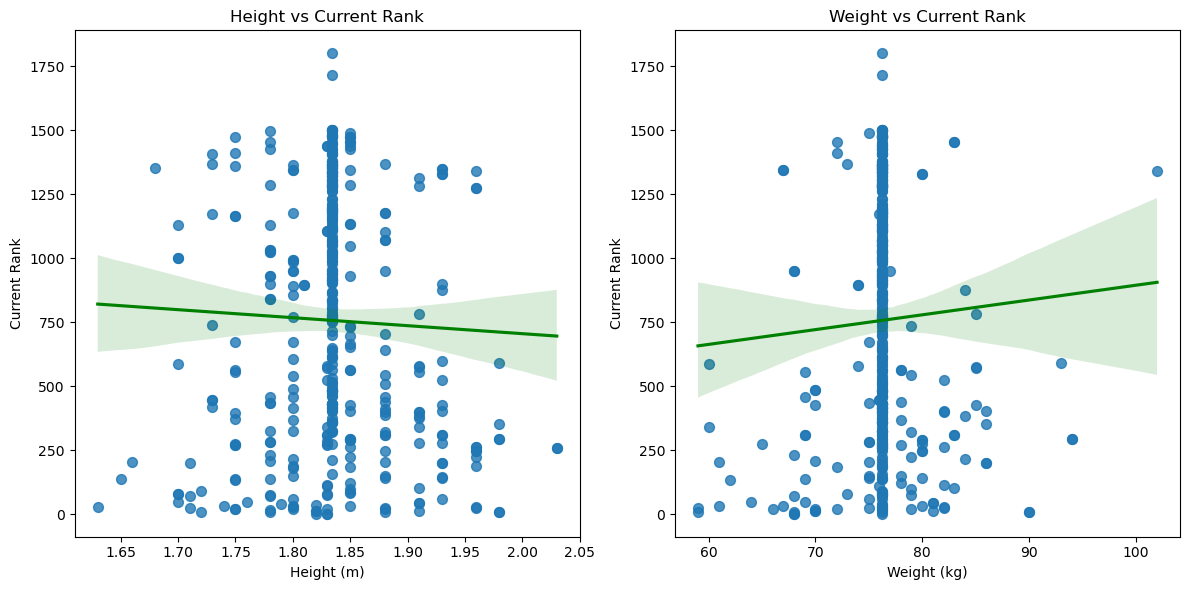

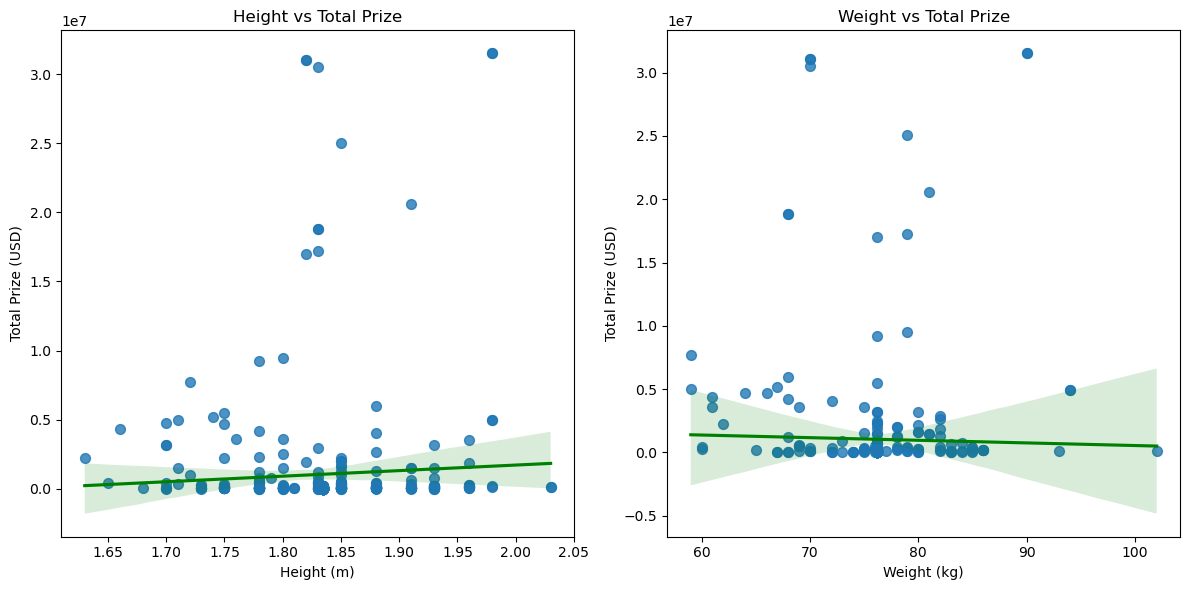

In [8]:
cleaned_df['height'] = pd.to_numeric(cleaned_df['height'], errors='coerce')
cleaned_df['weight'] = pd.to_numeric(cleaned_df['weight'], errors='coerce')
cleaned_df['current_rank'] = pd.to_numeric(cleaned_df['current_rank'], errors='coerce')
cleaned_df['total_prize'] = pd.to_numeric(cleaned_df['total_prize'], errors='coerce')

# مرحله 3: رسم نمودار پراکندگی و خطوط رگرسیون برای قد و رتبه
plt.figure(figsize=(12, 6))

# نمودار پراکندگی برای height و current_rank
plt.subplot(1, 2, 1)
sns.regplot(x='height', y='current_rank', data=cleaned_df, scatter_kws={'s':50}, line_kws={"color": "green"})
plt.title('Height vs Current Rank')
plt.xlabel('Height (m)')
plt.ylabel('Current Rank')

# نمودار پراکندگی برای weight و current_rank
plt.subplot(1, 2, 2)
sns.regplot(x='weight', y='current_rank', data=cleaned_df, scatter_kws={'s':50}, line_kws={"color": "green"})
plt.title('Weight vs Current Rank')
plt.xlabel('Weight (kg)')
plt.ylabel('Current Rank')

plt.tight_layout()
plt.show()

# مرحله 4: رسم نمودار پراکندگی و خطوط رگرسیون برای قد و جوایز
plt.figure(figsize=(12, 6))

# نمودار پراکندگی برای height و total_prize
plt.subplot(1, 2, 1)
sns.regplot(x='height', y='total_prize', data=cleaned_df, scatter_kws={'s':50}, line_kws={"color": "green"})
plt.title('Height vs Total Prize')
plt.xlabel('Height (m)')
plt.ylabel('Total Prize (USD)')

# نمودار پراکندگی برای weight و total_prize
plt.subplot(1, 2, 2)
sns.regplot(x='weight', y='total_prize', data=cleaned_df, scatter_kws={'s':50}, line_kws={"color": "green"})
plt.title('Weight vs Total Prize')
plt.xlabel('Weight (kg)')
plt.ylabel('Total Prize (USD)')

plt.tight_layout()
plt.show()


یکبار هم با دراپ کردن تمایمی مقادیر نال بررسی می کنیم

In [18]:
# مرحله 1: حذف مقادیر None یا NaN از ستون‌های 'current_rank' و 'total_prize'
cleaned_df2 = home_team_dataframe.dropna(subset=['current_rank', 'total_prize', 'height', 'weight'])

# مرحله 3: محاسبه همبستگی بین ویژگی‌های فیزیکی (قد و وزن) با رتبه و جوایز مالی
correlation_height_rank = cleaned_df2['height'].corr(cleaned_df['current_rank'])
correlation_weight_rank = cleaned_df2['weight'].corr(cleaned_df['current_rank'])
correlation_height_prize = cleaned_df2['height'].corr(cleaned_df['total_prize'])
correlation_weight_prize = cleaned_df2['weight'].corr(cleaned_df['total_prize'])

# نمایش نتایج همبستگی
print(f"Correlation between height and current rank: {correlation_height_rank}")
print(f"Correlation between weight and current rank: {correlation_weight_rank}")
print(f"Correlation between height and total prize: {correlation_height_prize}")
print(f"Correlation between weight and total prize: {correlation_weight_prize}")

Correlation between height and current rank: -0.054349711226596785
Correlation between weight and current rank: 0.11560539162666061
Correlation between height and total prize: 0.07762144217356493
Correlation between weight and total prize: -0.0289575130064951


### تحلیل همبستگی

ضرایب همبستگی که ارائه دادید، نشان‌دهنده قدرت و جهت روابط خطی بین ویژگی‌های فیزیکی (قد و وزن) و شاخص‌های عملکرد بازیکنان (رتبه کنونی و مجموع جوایز) هستند. در اینجا تجزیه و تحلیل هر یک از همبستگی‌ها آورده شده است:

1. **همبستگی بین قد و رتبه کنونی**: 
   - **مقدار**: -0.0543
   - **تفسیر**: همبستگی منفی بسیار ضعیفی بین قد و رتبه کنونی وجود دارد. این نشان می‌دهد که بازیکنان بلندقد لزوماً رتبه بهتری ندارند و رابطه به‌طور کلی ناچیز است.

2. **همبستگی بین وزن و رتبه کنونی**: 
   - **مقدار**: 0.1156
   - **تفسیر**: همبستگی مثبت ضعیفی بین وزن و رتبه کنونی وجود دارد. این نشان می‌دهد که بازیکنان سنگین‌تر ممکن است به‌طور جزئی رتبه‌های بهتری داشته باشند، اما این همبستگی هنوز ضعیف است و به این معنی است که عوامل دیگر احتمالاً تأثیر بیشتری بر رتبه کنونی دارند.

3. **همبستگی بین قد و مجموع جوایز**: 
   - **مقدار**: 0.0776
   - **تفسیر**: همبستگی بین قد و مجموع جوایز بسیار ضعیف و مثبت است. این به این معنی است که بازیکنان بلندقد ممکن است جوایز بیشتری کسب کنند، اما بار دیگر، رابطه کم‌قدرت است.

4. **همبستگی بین وزن و مجموع جوایز**: 
   - **مقدار**: -0.0290
   - **تفسیر**: همبستگی منفی بسیار ضعیفی بین وزن و مجموع جوایز وجود دارد. این نشان می‌دهد که تقریباً هیچ رابطه‌ای بین این دو متغیر وجود ندارد و وزن تأثیر قابل‌توجهی بر میزان جوایز ندارد.

### خلاصه

- همه همبستگی‌ها نسبتاً ضعیف هستند و نشان می‌دهند که قد و وزن تأثیر محدودی بر رتبه کنونی و مجموع جوایز بازیکنان دارند.
- سایر عوامل (مانند مهارت‌ها، تمرین، و تجربه) ممکن است نقش مهم‌تری در تعیین موفقیت در تنیس ایفا کنند تا فقط ویژگی‌های فیزیکی.


In [14]:
cleaned_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 0 to 430
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       110 non-null    int64  
 1   name           110 non-null    object 
 2   slug           110 non-null    object 
 3   gender         110 non-null    object 
 4   user_count     110 non-null    int64  
 5   residence      105 non-null    object 
 6   birthplace     110 non-null    object 
 7   height         110 non-null    float64
 8   weight         110 non-null    object 
 9   plays          109 non-null    object 
 10  turned_pro     55 non-null     object 
 11  current_prize  110 non-null    object 
 12  total_prize    110 non-null    object 
 13  player_id      110 non-null    int64  
 14  current_rank   110 non-null    object 
 15  name_code      110 non-null    object 
 16  country        109 non-null    object 
 17  full_name      110 non-null    object 
dtypes: float64(1), 

C:\Users\Battousai\AppData\Local\Temp\ipykernel_15288\3747929489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df2['height'] = pd.to_numeric(cleaned_df2['height'], errors='coerce')
C:\Users\Battousai\AppData\Local\Temp\ipykernel_15288\3747929489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df2['weight'] = pd.to_numeric(cleaned_df2['weight'], errors='coerce')
C:\Users\Battousai\AppData\Local\Temp\ipykernel_15288\3747929489.py:3: SettingWithCopyWarning: 
A value is trying to be se

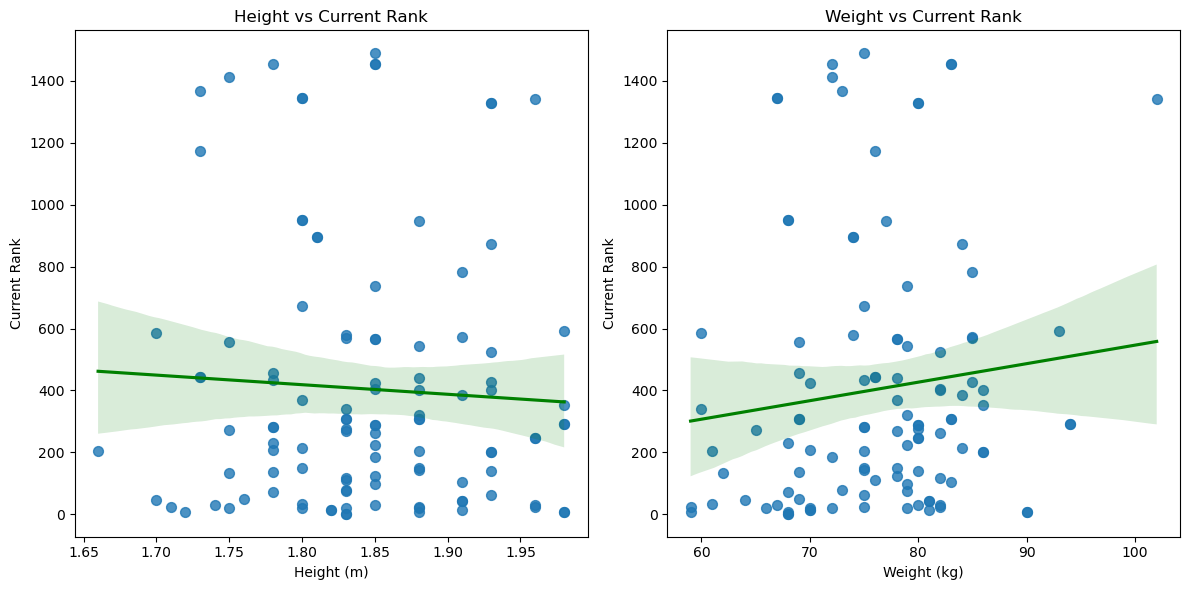

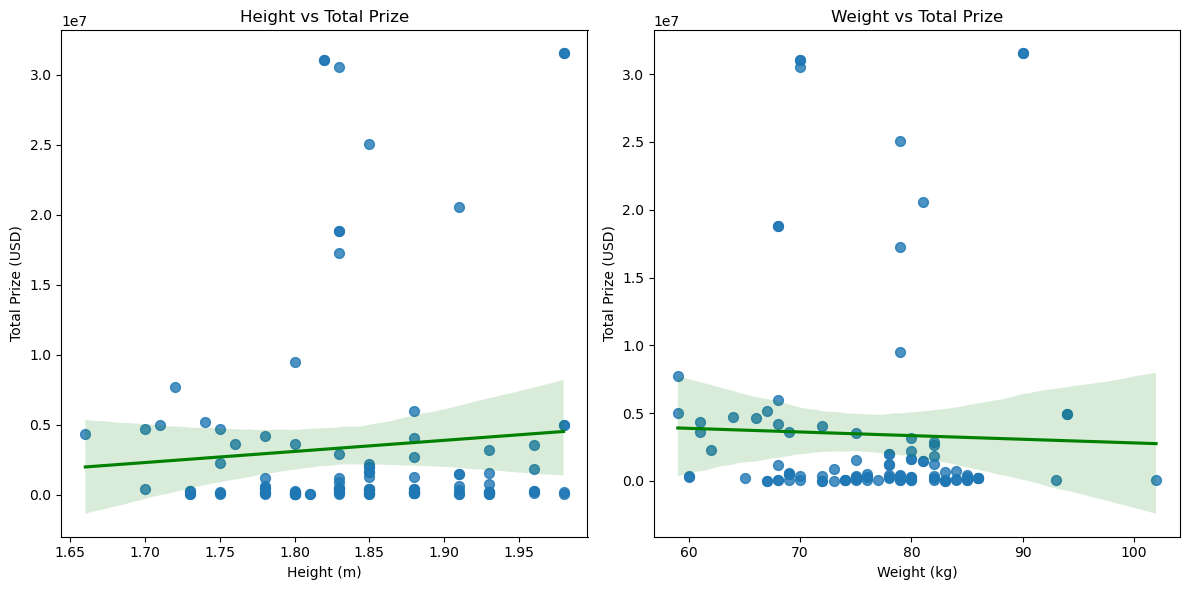

In [17]:
cleaned_df2['height'] = pd.to_numeric(cleaned_df2['height'], errors='coerce')
cleaned_df2['weight'] = pd.to_numeric(cleaned_df2['weight'], errors='coerce')
cleaned_df2['current_rank'] = pd.to_numeric(cleaned_df2['current_rank'], errors='coerce')
cleaned_df2['total_prize'] = pd.to_numeric(cleaned_df2['total_prize'], errors='coerce')

# مرحله 3: رسم نمودار پراکندگی و خطوط رگرسیون برای قد و رتبه
plt.figure(figsize=(12, 6))

# نمودار پراکندگی برای height و current_rank
plt.subplot(1, 2, 1)
sns.regplot(x='height', y='current_rank', data=cleaned_df2, scatter_kws={'s':50}, line_kws={"color": "green"})
plt.title('Height vs Current Rank')
plt.xlabel('Height (m)')
plt.ylabel('Current Rank')

# نمودار پراکندگی برای weight و current_rank
plt.subplot(1, 2, 2)
sns.regplot(x='weight', y='current_rank', data=cleaned_df2, scatter_kws={'s':50}, line_kws={"color": "green"})
plt.title('Weight vs Current Rank')
plt.xlabel('Weight (kg)')
plt.ylabel('Current Rank')

plt.tight_layout()
plt.show()

# مرحله 4: رسم نمودار پراکندگی و خطوط رگرسیون برای قد و جوایز
plt.figure(figsize=(12, 6))

# نمودار پراکندگی برای height و total_prize
plt.subplot(1, 2, 1)
sns.regplot(x='height', y='total_prize', data=cleaned_df2, scatter_kws={'s':50}, line_kws={"color": "green"})
plt.title('Height vs Total Prize')
plt.xlabel('Height (m)')
plt.ylabel('Total Prize (USD)')

# نمودار پراکندگی برای weight و total_prize
plt.subplot(1, 2, 2)
sns.regplot(x='weight', y='total_prize', data=cleaned_df2, scatter_kws={'s':50}, line_kws={"color": "green"})
plt.title('Weight vs Total Prize')
plt.xlabel('Weight (kg)')
plt.ylabel('Total Prize (USD)')

plt.tight_layout()
plt.show()


**نتیجه‌گیری**:

در هر تمامی نمودارها، خطوط رگرسیون شیب کمی دارند و ناحیه بازه اطمینان نسبتاً وسیع است، که نشان می‌دهد رابطه بین قد و وزن با مقدار کل جوایز ضعیف است و پیش‌بینی بر اساس این متغیرها با عدم قطعیت زیادی همراه است.